## $\color{darkblue}{\text{Importing required Libraries}}$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


## $\color{darkblue}{\text{Download the dataset from the link available above.:}}$


In [2]:
df=pd.read_csv(r"C:\Users\Irfan\Downloads\dataframe_.csv")
df.drop(df.filter(regex="Unnamed"),axis=1, inplace=True)

In [3]:
df

input      output
0    -122.740667 -130.572085
1    -121.531419 -129.938929
2    -134.917019 -130.141832
3    -120.605951 -125.760932
4    -129.894781 -112.785214
...          ...         ...
1692   25.410184  -76.380902
1693   29.537304  -82.796934
1694   31.633331  -87.000000
1695   29.091458 -104.943052
1696   17.145296 -101.726894

[1697 rows x 2 columns]

## $\color{darkblue}{\text{Basic Exploration::}}$


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [5]:
df.describe()

input       output
count  1696.000000  1696.000000
mean      1.159933   -34.088017
std      79.005970    65.771112
min    -134.962839  -132.422167
25%     -63.386506   -80.026767
50%      10.195194   -50.470981
75%      70.264109   -11.000000
max     134.605775   134.425495

## $\color{darkblue}{\text{Drop duplicates}}$

In [6]:

print(df.duplicated().sum())

df.drop_duplicates(inplace=True)

606



## $\color{darkblue}{\text{Missing values :}}$

In [7]:
df.isnull().sum()

input     1
output    1
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
num=df.select_dtypes(include='number')
cat=df.select_dtypes(exclude='number')


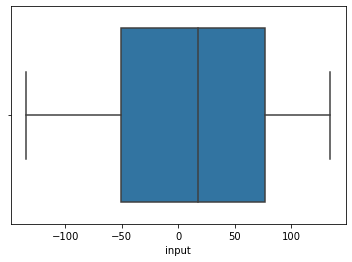

In [10]:
for i in num:
    sns.boxplot(df[i])
    plt.show()

In [11]:
df.isnull().sum()

input     0
output    0
dtype: int64

In [12]:
df

input      output
0    -122.740667 -130.572085
1    -121.531419 -129.938929
2    -134.917019 -130.141832
3    -120.605951 -125.760932
4    -129.894781 -112.785214
...          ...         ...
1105 -112.018496  121.096397
1107 -119.954237  123.609122
1108 -109.942155  127.197394
1109 -111.515368  128.170885
1110 -110.344221  123.087950

[1090 rows x 2 columns]

In [13]:
import os
os.getcwd()
df.to_csv('C:\\Users\\Irfan\\Machine Learning\\df.csv')

In [14]:
df=pd.read_csv("df.csv")
df.drop(df.filter(regex="Unnamed"),axis=1, inplace=True)
df

input      output
0    -122.740667 -130.572085
1    -121.531419 -129.938929
2    -134.917019 -130.141832
3    -120.605951 -125.760932
4    -129.894781 -112.785214
...          ...         ...
1085 -112.018496  121.096397
1086 -119.954237  123.609122
1087 -109.942155  127.197394
1088 -111.515368  128.170885
1089 -110.344221  123.087950

[1090 rows x 2 columns]

## $\color{darkblue}{\text{- Inputvariables:input}}$
## $\color{darkblue}{\text{- Target variable:output}}$
## $\color{darkblue}{\text{- Type:Supervised Learning(since target variable is given).}}$
## $\color{darkblue}{\text{- Task:Regression}}$
## $\color{darkblue}{\text{- Identify the Evaluation Metric.}}$
## $\color{darkblue}{\text{- Regression task: Mean Absolute Error}}$

In [15]:
X=df[["input"]]
y=df[['output']]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1090 non-null   float64
 1   output  1090 non-null   float64
dtypes: float64(2)
memory usage: 17.2 KB



## $\color{darkblue}{\text{Split the dataset into Training and Testing (recommended 75:25 split).}}$


In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(817, 1) (817, 1)
(273, 1) (273, 1)



## $\color{darkblue}{\text{Train_data}}$

In [18]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train), 
                                    columns = X_train.columns, 
                                    index = X_train.index)

X_train_num_rescaled

input
92   -0.971544
695  -0.101785
1050  1.370721
759  -0.977240
294   0.907271
...        ...
330   1.464943
466   1.345194
121  -0.748031
1044  1.604825
860  -1.746129

[817 rows x 1 columns]



## $\color{darkblue}{\text{Test data}}$

In [20]:
X_test_num=X_test.select_dtypes(include=['float64'])

In [21]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test), 
                                   columns = X_test.columns, 
                                   index = X_test.index)

X_test_num_rescaled

input
834  -1.410798
940   0.248286
1084 -1.597815
1005  0.992130
760  -1.079884
...        ...
566   0.703859
299   0.965640
939   0.432393
60   -1.588474
445   1.054469

[273 rows x 1 columns]

In [22]:
Algorithm=[]
mean_absolute_error=[]

## $\color{darkblue}{\text{Traning Linear Regression}}$

In [23]:
from sklearn.linear_model import LinearRegression
classifier = LinearRegression()
classifier.fit(X_train_num_rescaled, y_train)
y_test_pred = classifier.predict(X_test_num_rescaled)
from sklearn import metrics
a=metrics.mean_absolute_error(y_test,y_test_pred)
Algorithm.append("LinearRegression")
mean_absolute_error.append(a)
print(a)

43.85740160235116


In [24]:
sns.histplot(y_test, color='pink',kde=True)
sns.histplot(y_test_pred, color='green',kde=True);


## $\color{darkblue}{\text{Training-KNN Regression}}$

In [25]:
from sklearn.neighbors import KNeighborsRegressor
classifier=KNeighborsRegressor()
classifier.fit(X_train_num_rescaled,y_train)
y_test_pred=classifier.predict(X_test_num_rescaled)
from sklearn import metrics
a=metrics.mean_absolute_error(y_test,y_test_pred)
Algorithm.append("KNeighborsRegressor")
mean_absolute_error.append(a)
print(a)

23.367927419547254


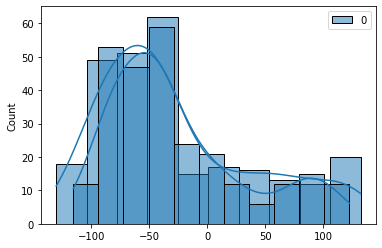

In [26]:
sns.histplot(y_test, color='pink',kde=True)
sns.histplot(y_test_pred, color='green',kde=True);



## $\color{darkblue}{\text{Training-Support vector Regression}}$

In [27]:
from sklearn.svm import SVR
classifier=SVR()
classifier.fit(X_train_num_rescaled,y_train)
y_test_pred=classifier.predict(X_test_num_rescaled)
from sklearn import metrics
a=metrics.mean_absolute_error(y_test,y_test_pred)
Algorithm.append("SVR")
mean_absolute_error.append(a)
print(a)

24.9156375496118


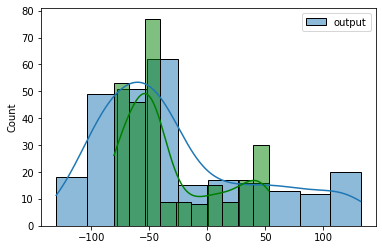

In [28]:
sns.histplot(y_test, color='pink',kde=True)
sns.histplot(y_test_pred, color='green',kde=True);

## $\color{darkblue}{\text{Training-Decision Tree Regression}}$


In [29]:
from sklearn.tree import DecisionTreeRegressor
classifier=DecisionTreeRegressor()
classifier.fit(X_train_num_rescaled,y_train)
y_test_pred=classifier.predict(X_test_num_rescaled)
from sklearn import metrics
a=metrics.mean_absolute_error(y_test,y_test_pred)
Algorithm.append("DecisionTreeRegressor")
mean_absolute_error.append(a)
print(a)

29.161937218296703


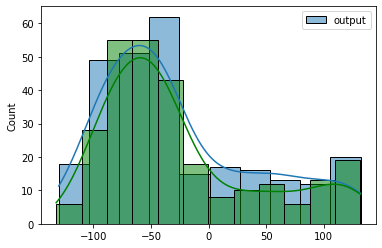

In [30]:
sns.histplot(y_test, color='pink',kde=True)
sns.histplot(y_test_pred, color='green',kde=True);


## $\color{darkblue}{\text{Ensemble}}$
## $\color{darkblue}{\text{Training-Random Forest Regression}}$

In [31]:
from sklearn.ensemble import RandomForestRegressor
classifier=RandomForestRegressor()
classifier.fit(X_train_num_rescaled,y_train)
y_test_pred=classifier.predict(X_test_num_rescaled)
from sklearn import metrics
a=metrics.mean_absolute_error(y_test,y_test_pred)
Algorithm.append("RandomForestRegressor")
mean_absolute_error.append(a)
print(a)

25.131624863839875


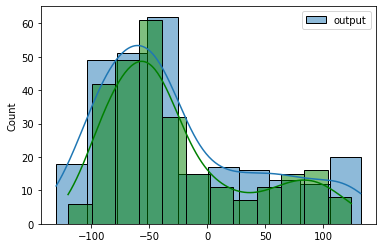

In [32]:
sns.histplot(y_test, color='pink',kde=True)
sns.histplot(y_test_pred, color='green',kde=True);


## $\color{darkblue}{\text{Training-Adaboost Regression}}$


In [33]:
from sklearn.ensemble import AdaBoostRegressor
classifier=AdaBoostRegressor()
classifier.fit(X_train_num_rescaled,y_train)
y_test_pred=classifier.predict(X_test_num_rescaled)
from sklearn import metrics
a=metrics.mean_absolute_error(y_test,y_test_pred)
Algorithm.append("AdaBoostRegressor")
mean_absolute_error.append(a)
print(a)

28.665753947303866


In [34]:
sns.histplot(y_test, color='pink',kde=True)
sns.histplot(y_test_pred, color='green',kde=True);

## $\color{darkblue}{\text{Training-Gradiant boost decision tree Regression}}$

In [35]:
from sklearn.ensemble import GradientBoostingRegressor
classifier=GradientBoostingRegressor()
classifier.fit(X_train_num_rescaled,y_train)
y_test_pred=classifier.predict(X_test_num_rescaled)
from sklearn import metrics
a=metrics.mean_absolute_error(y_test,y_test_pred)
Algorithm.append("GradientBoostingRegressor")
mean_absolute_error.append(a)
print(a)

22.62282287088458


In [36]:
sns.histplot(y_test, color='pink',kde=True)
sns.histplot(y_test_pred, color='green',kde=True);

In [37]:
overview=pd.DataFrame({"mean_absolute_error":mean_absolute_error,},index=Algorithm)

In [38]:
overview

mean_absolute_error
LinearRegression                     43.857402
KNeighborsRegressor                  23.367927
SVR                                  24.915638
DecisionTreeRegressor                29.161937
RandomForestRegressor                25.131625
AdaBoostRegressor                    28.665754
GradientBoostingRegressor            22.622823

In [39]:
overview.plot(kind='pie',subplots=True,explode=[0,0,0,0,0,0,0.1],title='Mean Absolute Error',ylabel=' ',autopct='%.2f')
plt.legend(bbox_to_anchor=(1.5,1));

In [63]:
overview.T.plot(kind='bar',width=0.8,align='center')
plt.legend(bbox_to_anchor=(1,1))
plt.xticks(fontsize=12);

## $\color{darkblue}{\text{Conclusion:}}$
- Gradiant boost decision tree Regression algorithm is the best model for Medical Cost Prediction
- Becuase Gradiant boost decision tree Regression mean absolute error is less compare to the other models .



## $\color{darkblue}{\text{Exploratory Data Analysis}}$
## $\color{darkblue}{\text{Univariate Analysis}}$


In [41]:
num

input      output
0    -122.740667 -130.572085
1    -121.531419 -129.938929
2    -134.917019 -130.141832
3    -120.605951 -125.760932
4    -129.894781 -112.785214
...          ...         ...
1105 -112.018496  121.096397
1107 -119.954237  123.609122
1108 -109.942155  127.197394
1109 -111.515368  128.170885
1110 -110.344221  123.087950

[1090 rows x 2 columns]

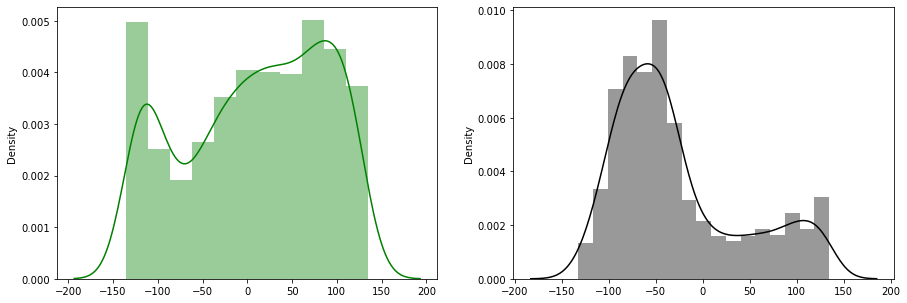

In [62]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.distplot(x=df['input'],ax=axes[0],color='green')
sns.distplot(x=df['output'],ax=axes[1],color='black')
plt.show()


## $\color{darkblue}{\text{Observation:}}$

- In input column the most of the values lies between -100 to 100.
- In output column  the most of the values lies between -100 to 0.

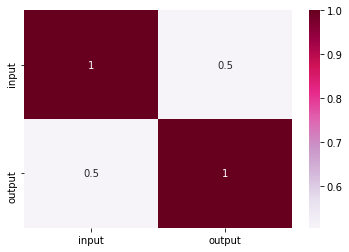

In [67]:
sns.heatmap(df.corr(),annot=True,cmap="PuRd");

## $\color{darkblue}{\text{Observation:}}$
- input and outut have postive correlation

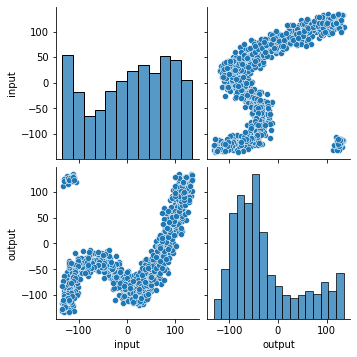

In [59]:
sns.pairplot(data=df);